In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import os
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [2]:
data = pd.read_csv('User Data Processed.csv')
data.head()

,User ID,User Difficulty Choice,User Read Books (2017),book contain words (2017),User Read number (2017),User Read shop (2017),User Read price (2017),User Read genre (2017),User Read sales (2017),User Read Words (2017),...,User Read Books (2018),book contain words (2018),User Read number (2018),User Read shop (2018),User Read price (2018),User Read genre (2018),User Read sales (2018),User Read Words (2018),User Read Difficulty (2018),Average Rating (2017)
0,ID790145788,1.0,6254,"['3368', '6030', '5392', '4091', '1495', '2018...",1,PythonBooks,6.0,17,6,9,...,7180,"['5611', '4201', '3996', '2934', '140', '2036'...",1,DHC-Online,1.0,18,3,1,1,3.115447
1,ID646234447,0.0,"5854, 5676, 7265, 6051","['4602', '8051', '2572', '1107', '489', '5096'...",4,"EduBooks, PythonBooks, Level 5 Daniel Shop, Le...","1.0, 3.0, 8.0, 7.0","0, 0, 0, 21","6, 4, 5, 1","2, 8, 6, 5",...,"5729, 5279, 6242, 5519, 5251","['5418', '398', '2572', '6716', '2202', '4454'...",5,"PythonBooks, Level 5 Daniel Shop, Level 5 Dani...","5.0, 5.0, 8.0, 8.0, 1.0","21, 21, 16, 16, 16","6, 3, 0, 1, 3","1, 4, 3, 9, 1","1, 5, 1, 1, 4",3.157876
2,ID86918707,5.0,5815,"['7064', '4813', '489', '5611', '71', '3122', ...",1,Daniel's Bookshop,5.0,4,6,0,...,"6372, 6697","['4377', '1389', '633', '3524', '3606', '1381'...",2,"DHC-Online, EduBooks","3.0, 2.0","4, 4","1, 9","6, 3","4, 4",1.512284
3,ID404262345,2.0,"6969, 7002, 5761","['5011', '4546', '6419', '2018', '4680', '7302...",3,"EduBooks, PythonBooks, EduBooks","5.0, 2.0, 0.0","19, 19, 17","0, 5, 0","7, 7, 2",...,"5023, 6412, 6124","['4984', '5004', '8133', '5418', '8090', '8080...",3,"EduBooks, PythonBooks, DHC-Online","4.0, 2.0, 8.0","17, 4, 4","6, 8, 0","7, 9, 3","2, 5, 5",3.641681
4,ID267634255,4.0,"7908, 7585, 7655, 5013, 5352, 7753, 5793","['5035', '1838', '3524', '7466', '7911', '6356...",7,"Level 5 Daniel Shop, Level 5 Daniel Shop, Leve...","6.0, 9.0, 1.0, 1.0, 3.0, 5.0, 8.0","14, 14, 14, 14, 14, 29, 29","5, 4, 3, 3, 4, 1, 2","7, 1, 8, 6, 5, 0, 0",...,"7915, 7884, 7404, 6022, 6589, 6543, 5450, 6848","['5187', '4749', '8076', '6127', '5863', '5418...",8,"EduBooks, EduBooks, EduBooks, DHC-Online, DHC-...","1.0, 8.0, 9.0, 1.0, 6.0, 8.0, 6.0, 8.0","29, 29, 29, 25, 25, 25, 25, 25","9, 9, 8, 7, 8, 2, 8, 9","7, 3, 4, 2, 7, 5, 2, 5","1, 4, 4, 3, 1, 1, 1, 2",2.506743


In [49]:
type(data['User Read price (2017)'][0])

str

In [51]:
# 每个用户对应不止1个price，genre，read books等，要
from scipy.sparse import csr_matrix
def one_hotted(colomn_name):
    result = data[colomn_name].astype(str).str.split(', ')
    counter = CountVectorizer(lowercase=False, tokenizer= lambda x: x)
    counter.fit(result)
    # CountVector之后得到的是稀疏矩阵，要todense转成稠密形式
    result = counter.transform(result).todense()
    # result[result>1] = 1
    print('column name:'+ str(column_name)+'\n'+'result.shape='+str(result.shape))
    return result

In [64]:
result = data['User Read genre (2017)'].astype(str).str.split(', ')
counter = CountVectorizer(lowercase=False, tokenizer= lambda x: x)
counter.fit(result)
# CountVector之后得到的是稀疏矩阵，要todense转成稠密形式
result = counter.transform(result).todense()
#     result[result>1] = 1
print('column name:'+ str('User Read shop (2017)')+'\n'+'result.shape='+str(result.shape))
result

column name:User Read shop (2017)
result.shape=(10000, 31)


matrix([[0, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [69]:
# start one hottlize
user_choice = one_hotted('User Difficulty Choice')

user_slaes_2017 = one_hotted('User Read sales (2017)')
user_words_2017 = one_hotted('User Read Words (2017)')
user_difficulty_2017 = one_hotted('User Read Difficulty (2017)')
user_genre_2017 = one_hotted('User Read genre (2017)')
user_price_2017 = one_hotted('User Read price (2017)')
user_shop_2017 = one_hotted('User Read shop (2017)')
user_num_2017 = one_hotted('User Read number (2017)')
user_books_2017 = one_hotted('User Read Books (2017)')
# book_words_2017 = one_hotted('book contain words (2017)')

user_slaes_2018 = one_hotted('User Read sales (2018)')
user_words_2018 = one_hotted('User Read Words (2018)')
user_difficulty_2018 = one_hotted('User Read Difficulty (2018)')
user_genre_2018 = one_hotted('User Read genre (2018)')
user_price_2018 = one_hotted('User Read price (2018)')
user_shop_2018 = one_hotted('User Read shop (2018)')
user_num_2018 = one_hotted('User Read number (2018)')
user_books_2018 = one_hotted('User Read Books (2018)')
# book_words_2018 = one_hotted('book contain words (2018)')

### Y_lable

In [70]:
# total score that every reader gives
books2017 = data['User Read Books (2017)']
splits2017 = books2017.str.split(', ')
n2017 = splits2017.str.len()
y = data['Average Rating (2017)']
Y = y*n2017

### X_lable

In [73]:
X = np.hstack((
    user_choice, # 6 colomns
    user_slaes_2017,# 10 colomns
    user_words_2017,# 10 colomns
    user_difficulty_2017, #5 colomns
    user_genre_2017, #31 colomns
    user_price_2017, # 11 colomns
    user_shop_2017, # 5 colomns
    user_num_2017, # 8 colomns
    np.eye(len(data)) # 10000 colomns
))
X.shape

(10000, 10086)

In [74]:
# 稀疏化表示
# IMPORTANT！ to speed up
X = csr_matrix(X)

## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

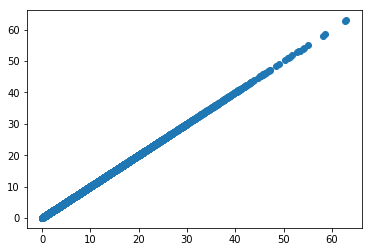

In [80]:
y_preds = linreg.predict(X)
plt.scatter(y_preds, Y)

In [81]:
linreg.coef_

array([ -1.09403392,  -1.14193325,  -1.01450309, ...,  -3.2580141 ,
        -3.89601838, -11.02097864])

In [82]:
linreg.coef_.shape

(10086,)

### 很严重的问题啊 。。。 这么多的参数，就很难确定是谁的参数。从而很难针对如何提升评分给出意见

### evaluate

In [85]:
from sklearn import metrics
print("Training MSE:",metrics.mean_squared_error(Y, y_preds))
# print("Test MSE:",metrics.mean_squared_error(Y, y_preds))

Training MSE: 1.8202152626304183e-13


- 如果加上words in book的话，MSE会变高：6.466772429739825e-11
- MSE是10的-13次方，这也太小了吧，很可能过拟合

## XGBoost

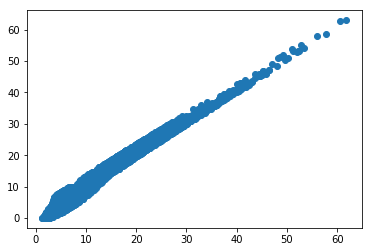

In [88]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.008, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=17)
xgb.fit(X,Y)
y_preds = xgb.predict(X)
plt.scatter(y_preds, Y)

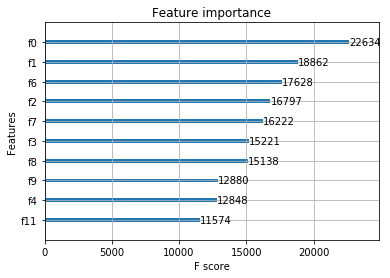

In [96]:
from xgboost import plot_importance
plot_importance(xgb,max_num_features=10)

In [94]:
from sklearn import metrics
print("Training MSE:",metrics.mean_squared_error(Y, y_preds))

Training MSE: 2.059626503928894


- 如果加上bag of words的话，MSE = 8.39411312351703
- estimators=500,MSE = 4.807318838801582
- input dimension多未必好

## 模型融合！！！

### 用上述训练好的2017年的模型，去predict2018年的评分

In [90]:
TEST = np.hstack((
    user_choice,
    user_slaes_2018,
    user_words_2018,
    user_difficulty_2018,
    user_genre_2018,
    user_price_2018,
    user_shop_2018,
    user_num_2018,
    np.eye(len(data))
))
TEST.shape
# 与2017年的feature矩阵大小一样

(10000, 10086)

In [91]:
y_submission = linreg.predict(TEST)
y_submission

array([ 2.80148266, 15.37146381,  4.76099314, ...,  5.59882631,
        8.17587299, 12.14816309])

### 统一分数区间

In [92]:
y_submission[y_submission > 10] = 10
y_submission[y_submission < 0] = 0

### 整理成提交的格式

In [93]:
data['Average Rating (2018)'] = y_submission
output = data[['User ID', 'Average Rating (2018)']]
output.head()
#output.to_csv('submission_11.csv', sep=',', index=False)

,User ID,Average Rating (2018)
0,ID790145788,2.801483
1,ID646234447,10.000000
2,ID86918707,4.760993
3,ID404262345,10.000000
4,ID267634255,10.000000
